# Before you start:
- Read the README.md file
- Comment as much as you can and use the resources (README.md file)
- Happy learning!

# Import Libraries

In [145]:
import math
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as st

In [59]:

from scipy.stats import ttest_1samp


In [22]:
%matplotlib inline

In [23]:
pd.set_option('display.max_columns',None)

# Challenge 1 - Exploring the Data

In this challenge, we will examine all salaries of employees of the San Francisco. We will start by loading the dataset and examining its contents. 

In [24]:
salaries = pd.read_csv('data/Salaries.csv')

/Users/albertomengual/opt/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (3,4,5,6,12) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


Examine the `salaries` dataset using the `head` function below.

In [25]:
salaries.head()

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.0,400184.25,NaN,567595.43,567595.43,2011,NaN,San Francisco,NaN
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,NaN,538909.28,538909.28,2011,NaN,San Francisco,NaN
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.6,NaN,335279.91,335279.91,2011,NaN,San Francisco,NaN
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.0,56120.71,198306.9,NaN,332343.61,332343.61,2011,NaN,San Francisco,NaN
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.6,9737.0,182234.59,NaN,326373.19,326373.19,2011,NaN,San Francisco,NaN


We see from looking at the `head` function that there is quite a bit of missing data. Get the amount of missing data in every column

In [26]:
salaries.isna().sum()

Id                       0
EmployeeName             0
JobTitle                 0
BasePay                605
OvertimePay              0
OtherPay                 0
Benefits             36159
TotalPay                 0
TotalPayBenefits         0
Year                     0
Notes               148654
Agency                   0
Status              110535
dtype: int64

Get the shape of the dataframe

In [27]:
salaries.shape

(148654, 13)

Given output of the previous two cells, drop the corresponding column and compute again the amount of missing values.

In [28]:
salaries.drop(columns='Notes', inplace=True)

In [29]:
salaries.isna().sum()

Id                       0
EmployeeName             0
JobTitle                 0
BasePay                605
OvertimePay              0
OtherPay                 0
Benefits             36159
TotalPay                 0
TotalPayBenefits         0
Year                     0
Agency                   0
Status              110535
dtype: int64

Check out what are the possible values of the column "Status".

In [30]:
salaries.Status.unique()

array([nan, 'PT', 'FT'], dtype=object)

Drop any row with missing values in the "Status" column and compute again the number of missing values.

In [31]:
salaries.dropna(axis=0, subset=['Status'], inplace=True)

In [32]:
# Another alternative:
# salaries = salaries[salaries.Status != nan]

In [33]:
salaries.isna().sum()

Id                  0
EmployeeName        0
JobTitle            0
BasePay             0
OvertimePay         0
OtherPay            0
Benefits            0
TotalPay            0
TotalPayBenefits    0
Year                0
Agency              0
Status              0
dtype: int64

Check out the types of each column and see if they make sense.

In [34]:
salaries.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38119 entries, 110531 to 148653
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Id                38119 non-null  int64  
 1   EmployeeName      38119 non-null  object 
 2   JobTitle          38119 non-null  object 
 3   BasePay           38119 non-null  object 
 4   OvertimePay       38119 non-null  object 
 5   OtherPay          38119 non-null  object 
 6   Benefits          38119 non-null  object 
 7   TotalPay          38119 non-null  float64
 8   TotalPayBenefits  38119 non-null  float64
 9   Year              38119 non-null  int64  
 10  Agency            38119 non-null  object 
 11  Status            38119 non-null  object 
dtypes: float64(2), int64(2), object(8)
memory usage: 3.8+ MB


In [35]:
salaries.head()

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Agency,Status
110531,110532,David Shinn,Deputy Chief 3,129150.01,0.0,342802.63,38780.04,471952.64,510732.68,2014,San Francisco,PT
110532,110533,Amy P Hart,Asst Med Examiner,318835.49,10712.95,60563.54,89540.23,390111.98,479652.21,2014,San Francisco,FT
110533,110534,William J Coaker Jr.,Chief Investment Officer,257340.0,0.0,82313.7,96570.66,339653.70,436224.36,2014,San Francisco,PT
110534,110535,Gregory P Suhr,Chief of Police,307450.04,0.0,19266.72,91302.46,326716.76,418019.22,2014,San Francisco,FT
110535,110536,Joanne M Hayes-White,"Chief, Fire Department",302068.0,0.0,24165.44,91201.66,326233.44,417435.10,2014,San Francisco,FT


Do any type conversions and reset the index.

In [36]:
# salaries.loc[:,'BasePay':'Benefits'] = pd.to_numeric(salaries.loc[:,'BasePay':'Benefits'])
# TypeError: arg must be a list, tuple, 1-d array, or Series

salaries.loc[:,'BasePay':'Benefits'] = salaries.loc[:,'BasePay':'Benefits'].astype(float)

In [37]:
salaries.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38119 entries, 110531 to 148653
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Id                38119 non-null  int64  
 1   EmployeeName      38119 non-null  object 
 2   JobTitle          38119 non-null  object 
 3   BasePay           38119 non-null  float64
 4   OvertimePay       38119 non-null  float64
 5   OtherPay          38119 non-null  float64
 6   Benefits          38119 non-null  float64
 7   TotalPay          38119 non-null  float64
 8   TotalPayBenefits  38119 non-null  float64
 9   Year              38119 non-null  int64  
 10  Agency            38119 non-null  object 
 11  Status            38119 non-null  object 
dtypes: float64(6), int64(2), object(4)
memory usage: 3.8+ MB


In [38]:
salaries.head()

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Agency,Status
110531,110532,David Shinn,Deputy Chief 3,129150.01,0.00,342802.63,38780.04,471952.64,510732.68,2014,San Francisco,PT
110532,110533,Amy P Hart,Asst Med Examiner,318835.49,10712.95,60563.54,89540.23,390111.98,479652.21,2014,San Francisco,FT
110533,110534,William J Coaker Jr.,Chief Investment Officer,257340.00,0.00,82313.70,96570.66,339653.70,436224.36,2014,San Francisco,PT
110534,110535,Gregory P Suhr,Chief of Police,307450.04,0.00,19266.72,91302.46,326716.76,418019.22,2014,San Francisco,FT
110535,110536,Joanne M Hayes-White,"Chief, Fire Department",302068.00,0.00,24165.44,91201.66,326233.44,417435.10,2014,San Francisco,FT


Check out if "TotalPayBenefits" = "BasePay" + "OvertimePay" + "OtherPay" + "Benefits"

In [39]:
# salaries.TotalPayBenefits == salaries.loc[:,'BasePay':'Benefits'].sum()
# ValueError: Can only compare identically-labeled Series objects

salaries.TotalPayBenefits == salaries.BasePay+salaries.OvertimePay+salaries.OtherPay+salaries.Benefits



110531     True
110532    False
110533     True
110534    False
110535     True
          ...  
148645     True
148647     True
148648     True
148649     True
148653     True
Length: 38119, dtype: bool

0         True
1        False
2         True
3        False
4         True
         ...  
38114     True
38115     True
38116     True
38117     True
38118     True
Length: 38119, dtype: bool

What is the percetage of employees for which the previous assumption is not True?

In [45]:
# (salaries.TotalPayBenefits == salaries.BasePay+salaries.OvertimePay+salaries.OtherPay+salaries.Benefits).value_counts()
loan_assumption = (salaries.TotalPayBenefits == salaries.BasePay+salaries.OvertimePay+salaries.OtherPay+salaries.Benefits)
loan_assumption.value_counts()/len(loan_assumption)*100


True     73.708649
False    26.291351
dtype: float64

True     73.708649
False    26.291351
dtype: float64

There are different departments in the city. List all departments and the count of employees in each department.

In [57]:
salaries.groupby('JobTitle')['EmployeeName'].agg('count').pipe(pd.DataFrame)\
.rename(columns={'EmployeeName':'Employees'})
#pd.Series.nunique()

,Employees
JobTitle,
"ACPO,JuvP, Juv Prob (SFERS)",1
ASR Senior Office Specialist,22
ASR-Office Assistant,15
Account Clerk,93
Accountant I,2
...,...
Wire Rope Cable Maint Sprv,1
Worker's Comp Supervisor 1,6
Worker's Compensation Adjuster,26


,Employees
JobTitle,
"ACPO,JuvP, Juv Prob (SFERS)",1
ASR Senior Office Specialist,22
ASR-Office Assistant,15
Account Clerk,93
Accountant I,2
...,...
Wire Rope Cable Maint Sprv,1
Worker's Comp Supervisor 1,6
Worker's Compensation Adjuster,26


# Challenge 2 - Hypothesis Tests

## Two-sided

In this section of the lab, we will test whether the hourly wage of **all FT workers is significantly different from $75/hr**. Get first the hourly wage by dividing "TotalPayBenefits" by 50 weeks (assuming 10 labour days of holidays) and by 40hrs (assuming a 40hrs week).

$$Hourly Wage = \frac{TotalPayBenefits}{1 year}\frac{1 year}{50 Week}\frac{1 Week}{40 hr}$$

Import the correct one sample test function from scipy and perform the hypothesis test for a 95% two sided confidence interval.

  
H0: FT workers average hourly salary is \\$75/h  
H1: FT workers average hourly salary is not \\$75/h


In [ ]:
# This first part of the challenge does not exactly follow the expected working sequence, I just learned with it...
# I tried to explain my own steps

In [61]:
salaries['Hourly_Wage'] = salaries.TotalPayBenefits/2000
salaries.head()

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Agency,Status,Hourly_Wage
110531,110532,David Shinn,Deputy Chief 3,129150.01,0.00,342802.63,38780.04,471952.64,510732.68,2014,San Francisco,PT,255.366340
110532,110533,Amy P Hart,Asst Med Examiner,318835.49,10712.95,60563.54,89540.23,390111.98,479652.21,2014,San Francisco,FT,239.826105
110533,110534,William J Coaker Jr.,Chief Investment Officer,257340.00,0.00,82313.70,96570.66,339653.70,436224.36,2014,San Francisco,PT,218.112180
110534,110535,Gregory P Suhr,Chief of Police,307450.04,0.00,19266.72,91302.46,326716.76,418019.22,2014,San Francisco,FT,209.009610
110535,110536,Joanne M Hayes-White,"Chief, Fire Department",302068.00,0.00,24165.44,91201.66,326233.44,417435.10,2014,San Francisco,FT,208.717550


,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Agency,Status,Hourly_Wage
0,110532,David Shinn,Deputy Chief 3,129150.01,0.00,342802.63,38780.04,471952.64,510732.68,2014,San Francisco,PT,255.366340
1,110533,Amy P Hart,Asst Med Examiner,318835.49,10712.95,60563.54,89540.23,390111.98,479652.21,2014,San Francisco,FT,239.826105
2,110534,William J Coaker Jr.,Chief Investment Officer,257340.00,0.00,82313.70,96570.66,339653.70,436224.36,2014,San Francisco,PT,218.112180
3,110535,Gregory P Suhr,Chief of Police,307450.04,0.00,19266.72,91302.46,326716.76,418019.22,2014,San Francisco,FT,209.009610
4,110536,Joanne M Hayes-White,"Chief, Fire Department",302068.00,0.00,24165.44,91201.66,326233.44,417435.10,2014,San Francisco,FT,208.717550


### Compute t_statistic

In [ ]:
# Your code here: (compute the t_statistic). Take into account that this dataset is a sample of a real population.
# Remember that you only need to consider "FT" employees

In [75]:
# Just curious, which is our mean?
ft_mean = salaries.Hourly_Wage[salaries.Status == 'FT'].mean()
ft_mean
# ? which is the mean error?

69.264206407271

In [76]:
# And the standard deviation
ft_std = salaries.Hourly_Wage[salaries.Status == 'FT'].std()
ft_std

23.939610982990427

In [63]:
# Define the sample
sample = salaries.Hourly_Wage[salaries.Status == 'FT']

In [65]:
# ttest
stat, pval = ttest_1samp(sample, popmean=75, alternative='two-sided')

In [96]:
# pval in each extreme of t-distribution
pval/2

2.2589156169197237e-273

In [95]:
# Alternative pval method
st.t.cdf(stat,df=len(sample)-1)

2.2589156169197237e-273

In [67]:
stat

-35.80631941460526

In [90]:
# Mean error
(ft_mean-75)

-5.735793592728996

In [91]:
# t_statistic manually
stat_man = (ft_mean-75)/(ft_std/len(sample)**0.5)
stat_man

-35.80631941460788

In [19]:
# ANSWER
-35.80631941460788

-35.80631941460788

### Method 1: Critcal value

In [ ]:
# Method 1: Critical value. Get the critical value and compare it against your t_statisttic.
# Your code here: 


In [70]:
alpha = 0.05

critical_ppf = st.t.ppf(alpha/2,df = len(sample)-1)

critical_ppf

-1.9600702128845597

In [71]:
abs(stat) > abs(critical_ppf)

True

In [88]:
# The critical mean for the critical ppf --> ??? mean error?
critical_value = ft_mean-critical_ppf*(ft_std/len(sample)**0.5)
critical_value

69.57818892075369

In [89]:
# ??? which value brings ppf = 0? --> the mean of the sample
# ??? Why the mean error has this sign? --> read below

It places the population mean in the center of the t-student distribution where the peak of frequencies lays.  
If the sample mean is higher than the population mean, the mean error will be positive.  
If the sample mean is lower than the population mean, the mean error will be negative.  
In the x-axis of the t distribution we have the mean error over the standard error (sample_std/sqrt(N)).
In the y-axis the frequency that a mean happens.  
And the area among the curve and the axis is the accumulated probability that certain mean error happens.

### Doubts summary

In [ ]:
# ??? If we take two or more samples from the same population, will they have the same standard error? --> NO
# ??? What does it mean?

# ??? How does the standard error affect the probability distribution of the means of the samples of a population?
# --> By "approximation" the standard error is the std of the probability distribution of the samples' means.
# --> The standard error determines the range of the t_criticals, the limits of the confidence interval
# A higher n sample increases the t_statistics (reduces the confidence interval). 
# A higher std (dispersion) reduces the t_statistics (increase the confidence interval).

# ??? Why the number of observations of the population is not considered?



The value that brings the stat (ppf) to 0 is the mean of the sample.  
***
What we are really cheching is that the t-value of the mean error is located within the confidence interval (1-alpha) of the population mean in the hypothesis H0, accordingly to the standard error provided by the sample. Watch out, the number of samples will also affect the shape of the distribution.  
***
The following statement is CONCEPTUALLY WRONG:  
So we are checking indeed whether the population mean is located within a confidence interval of 95%.  
In this method, that interval is limited by the critical ppfs: +1.96 and -1.96.  
As the statistic "ppf" of the mean of the population in the null hypothesis H0: \\$75/h is far smaller than the critical ppf, the H0 hypothesis is rejected and the hypothesis H1 is confirmed.
The average of the population is different from \\$75/h

***
The statistic is far smaller than the critical ppf: -35.8 << -1.96.  

As the mean error can not be placed within the confidence interval. Based on this sample, the population mean can not be the value defined in H0: \\$ 75/h.  
H0 is rejected.  
H1 is validated. 

In [ ]:
# ??? Which would be the higher confidence to reject H0?


### Plot t-distribution

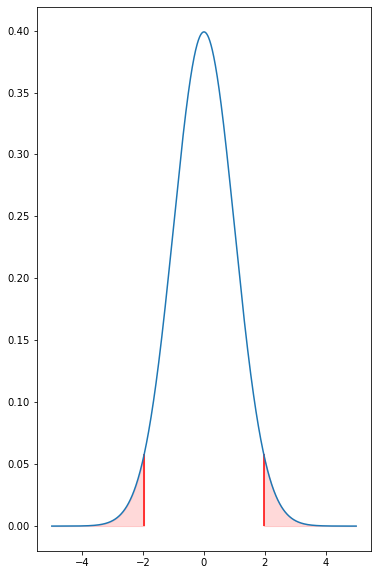

In [123]:
x = np.linspace(-5,5,1000)
y_pdf = st.t.pdf(x,df=len(sample)-1)

f,ax = plt.subplots(1,1,figsize=(6,10))

ax.plot(x,y_pdf, label='pdf')
ax.vlines(x=critical_ppf, ymin=0, ymax=st.t.pdf(critical_ppf, df=len(sample)-1), color='r')
ax.vlines(x=-critical_ppf, ymin=0, ymax=st.t.pdf(critical_ppf, df=len(sample)-1), color='r')

idx_lower, idx_upper = abs(x-critical_ppf).argmin(), abs(x+critical_ppf).argmin()
idx_lower = abs(x-critical_ppf).argmin()
ax.fill_between(x[:idx_lower],y_pdf[:idx_lower], color ='r', alpha=0.15)
ax.fill_between(x[idx_upper:],y_pdf[idx_upper:], color ='r', alpha=0.15)

plt.show()

In [120]:
idx_lower

304

### Method 2: p-value

In [ ]:
# Method 2: Use the p-value method.
# Your code here:
    

In [124]:
pval/2

2.2589156169197237e-273

In [130]:
st.t.cdf(stat_man,df=len(sample)-1)

2.2589156167195097e-273

In [128]:
critical_cdf = st.t.cdf(alpha/2, df=len(sample)-1)
critical_cdf

0.5099724065150292

In [129]:
pval/2 < critical_cdf

True

The p-value of our test is lower than the critical accumulated probability.  
It means the test probability is not within the confidence probability. The null hypothesis must be rejected.  


### Method 3: ttest

In [ ]:
# Method 3: Use the ttest_1samp function from scipy. 
# Check the documentation [here](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_1samp.html)
# Make sure that you have a scipy version >=1.6.0. If that's not your case please ugrade your scipy version using
# !pip install -U scipy
# Your code here:

#from scipy.stats import ttest_1samp



In [131]:
# Already done above

Are all the methods in agreement?

Yes, they are all in agreement.

## One-sided

We are also curious about salaries in the police force. The chief of police in Chicago claimed in a press briefing that salaries this year are **higher than last year's mean of $86000/year for all salaried employees** (use the column "TotalPayBenefits". Test  hypothesis using a 95% confidence interval.

Hint: Use apply and a lambda function to check whether "Police" is in the "JobTitle" to get all the "Police" jobs.

Hypotheses:  
* null hypothesis, H0: salaries this year > \\$ 86000/year
* alternate hypothesis, H1: mean_salaries <= \\$ 86000/year

Reasoning - rejection region position:  
As we are looking for a positive mean error (the sample's mean higher than last years' population mean) we place the whole significance interval, the rejection region, in the negative side of the probability distribution.  
Besides the H1's inequation points left :)

### compute t_statistic

In [ ]:
# Your code here: (compute the t_statistic). Take into account that this dataset is a sample of a real population.
# Remember that you only need to consider "Police" employees


In [144]:
# Get the sample

# With lambda:
#lambda_sample = salaries.TotalPayBenefits[salaries.JobTitle.apply(lambda x: True if 'Police' in x else False)]
#display(lambda_sample)

# Filter Job titles: could be done with  pattern or regex? -->
sample2 = salaries.TotalPayBenefits[salaries.JobTitle.str.contains('police', case=False)]
sample2

110534    418019.22
110617    301749.81
110674    289114.95
110712    280222.76
110831    267235.00
            ...    
148312       374.42
148409       242.66
148437       212.39
148506       134.78
148561        70.37
Name: TotalPayBenefits, Length: 1901, dtype: float64

In [148]:
stat2_man = (sample2.mean()-86000)/(sample2.std()/math.sqrt(len(sample2)))
stat2_man

50.252984742109916

In [25]:
# SOLUTION

50.252984742109916

50.252984742109916

### Method 1: Critical Value

In [ ]:
# Method 1: Critical value. Get the critical value and compare it against your statisttic.
# Your code here: 


In [149]:
alpha2 = 0.05

In [150]:
t_critical = st.t.ppf(alpha2, df=len(sample2)-1)
t_critical

-1.645656004264731

__ANSWER__  
The t_statistical is higher than t_critical. It is placed in the confidence interval.  
The mean error is positive.  There is no doubt this year salaries's mean is higher than last year's.  
The null hypothesis, H0, is accepted.

### Method 2: p-value

In [ ]:
# Method 2: Use the p-value method.
# Your code here:


In [151]:
pval_man2 = st.t.cdf(stat2_man, df=len(sample2)-1)
pval_man2

1.0

In [153]:
pval_critical = st.t.cdf(t_critical, df=len(sample2)-1)
pval_critical
# 0.05 !!!

0.04999999999999998

In [154]:
pval_man2 > pval_critical

True

__ANSWER__  
The accumulated probability of the test is higher than the rejection area (significance interval) so the null hypothesis is accepted.  
The mean salaries have increased.

### Method 3: ttest_1samp

In [ ]:
# Method 3: Use the ttest_1samp function from scipy. 
# Check the documentation [here](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_1samp.html)
# Make sure that you have a scipy version >=1.6.0. If that's not your case please ugrade your scipy version using
# !pip install -U scipy
# Your code here:


In [161]:
stat2, pval2 = st.ttest_1samp(sample2, popmean=86000, alternative="less")

In [ ]:
# ??? What does scipy consider "the mean of the underlyind distribution of the sample"?
# 'less’: the mean of the underlying distribution of the sample is less than the given population mean (popmean)
# ??? The alternate hypothesis?

In [164]:
sample2.mean()

148349.04212519721

In [162]:
stat2

50.252984742109945

In [163]:
pval2

1.0

In [165]:
stat2 > t_critical

True

In [166]:
pval2 > pval_critical

True

## One-sided (right)

The workers from the "JobTitle" with the most employees have complained that their hourly wage is **less than $35/hour**. Using a one sample t-test, test this one-sided hypothesis at the 95% confidence level.

__HYPOTHESES__  
* null hypothesis H0: Average Hourly Wage < \\$ 35/h.  
* alternate hypothesis H1: Average Hourly Wage >= \\$ 35/h.

__REJECTION/SIGNIFICANCE AREA__  
The null hypothesis looks for a negative mean error. The rejection are is on the right side.

In [171]:
# Your code here: (Get the department which has most employees)
salaries.JobTitle.mode()[0]

'Transit Operator'

In [169]:
salaries.JobTitle.value_counts().index[0]

'Transit Operator'

In [175]:
alpha3 = 0.05

### Compute t_statistic

In [30]:
# Your code here: (compute the t_statistic). Take into account that this dataset is a sample of a real population.
# Remember that you only need to consider the right "JobTitle" employees



19.06499032490655

In [173]:
# Get the sample:
sample3 = salaries.Hourly_Wage[salaries.JobTitle == 'Transit Operator']
sample3.head()

113754    97.123380
114068    95.073540
114297    93.648710
114911    90.802020
115422    88.494395
Name: Hourly_Wage, dtype: float64

In [174]:
# Check the mean
sample3_mean = sample3.mean()
sample3_mean

43.35949773900775

In [176]:
# t_statistic
stat3_man = (sample3.mean()-35)/(sample3.std()/math.sqrt(len(sample3)))
stat3_man

19.06499032490655

In [ ]:
# ANSWER
19.06499032490655

### Method 1: Critical Valuem

In [ ]:
# Method 1: Critical value. Get the critical value and compare it against your statisttic.
# Your code here: 


In [178]:
t_critical3 = st.t.ppf(0.95,df=len(sample3)-1)
t_critical3

1.645468777247024

In [179]:
t_critical3 > stat3_man

False

__ANSWER__  
The null hypothesis is rejected. The average salary is higher than \\$ 35/h

### Method 3: p-value

In [ ]:
# Method 2: Use the p-value method.
# Your code here:


In [181]:
pval_critical3 = 0.95
pval_critical3

0.95

In [182]:
pval_stat3 = st.t.cdf(stat3_man, df= len(sample3)-1)
pval_stat3

1.0

In [183]:
pval_critical3 > pval_stat3

False

__ANSWER__  
The H0 is rejected

# Method 3: ttest_1samp

In [ ]:
# Method 3: Use the ttest_1samp function from scipy. 
# Check the documentation [here](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_1samp.html)
# Make sure that you have a scipy version >=1.6.0. If that's not your case please ugrade your scipy version using
# !pip install -U scipy
# Your code here:


In [193]:
stat3, pval3 = st.ttest_1samp(sample3,popmean=35,alternative='less')

In [194]:
stat3

19.064990324906383

In [195]:
pval3

1.0

In [196]:
t_critical3 > stat3

False

In [197]:
pval_critical3 > pval3

False

__ANSWER__  
H0 rejected

In [ ]:
# ??? I do not understand the alternative parameter

# Challenge 3: To practice - Constructing Confidence Intervals

While testing our hypothesis is a great way to gather empirical evidence for accepting or rejecting the hypothesis, another way to gather evidence is by creating a confidence interval. A confidence interval gives us information about the true mean of the population. So for a 95% confidence interval, we are 95% sure that the mean of the population is within the confidence interval. 
).

To read more about confidence intervals, click [here](https://en.wikipedia.org/wiki/Confidence_interval).


In the cell below, we will construct a 95% confidence interval for the mean hourly wage of all hourly workers. 

To compute the confidence interval of the hourly wage, use the 0.95 for the confidence level.

## Method 1: Get the critical value

In [34]:
# Method 1: Get the critical values which correspond to a 95% confidence.
# Your code here:


Sample mean: 50.13
Confidence interval: [49.80,50.46]


In [206]:
sample4 = salaries.Hourly_Wage
mean4 = sample4.mean()
mean4


50.130719334189436

In [208]:
standard_error = st.sem(sample4)
standard_error

0.16962218029157494

In [209]:
t_lower = st.t.ppf(0.05/2,df=len(sample4)-1)
t_lower

-1.9600262214170783

In [211]:
t_lower*standard_error+mean4

49.798255413084014

In [212]:
t_upper = st.t.ppf(1-0.05/2,df=len(sample4)-1)
t_upper

1.9600262214170778

In [213]:
t_upper*standard_error+mean4

50.46318325529486

In [205]:
st.t.interval(0.95,len(salaries)-1,salaries.Hourly_Wage.mean(),salaries.Hourly_Wage.std()/math.sqrt(len(salaries)))

(49.798255413084014, 50.46318325529486)

In [199]:
# ANSWER:
print('Sample mean: 50.13')
print('Confidence interval: [49.80,50.46]')

Sample mean: 50.13
Confidence interval: [49.80,50.46]


Now compute a 95% confidence interval for the hourly salary of all the Police employees.

In [35]:
# Your code here:


Sample mean: 74.17
Confidence interval: [73.90,74.45]


In [218]:
sample5 = salaries.Hourly_Wage[salaries.JobTitle.str.contains('police', case=False)]

mean5 = sample5.mean()
mean5

74.1745210625985

In [219]:
st.sem(sample5)

0.6203516313027206

In [222]:
sample5.std()/math.sqrt(len(sample5))

0.6203516313027195

In [220]:
st.t.interval(0.95,len(sample5)-1,mean5,st.sem(sample5))

(72.9578791736444, 75.3911629515526)

In [225]:
mean5+st.t.ppf(0.05/2,len(sample5)-1)*st.sem(sample5)

72.9578791736444

In [226]:
# !!! The answer does not match

In [255]:
# Confidence Interval with the normal distribution
#confidence_interval_normal = scipy.stats.norm.interval(confidence_level,  
#                                             sample_mean, 
#                                             sample_standard_error)

conf_int = st.norm.interval(0.95,mean5,st.sem(sample5))
conf_int

(72.9586542074945, 75.3903879177025)

In [256]:
print('Sample mean: {:.2f}'.format(mean5))
print('Confidence interval: [{:.2f},{:.2f}]'.format(conf_int[0],conf_int[1]))

Sample mean: 74.17
Confidence interval: [72.96,75.39]


Sample mean: 74.17  
Confidence interval: [73.90,74.45]

# Challenge 4: Chi2 test

Now we want to know if the amount of full time "FT" and part time "PT" employees is equal between Lawers, Meds, Police, Firemen and other departments. 

Considering all the options in this groups of employees will be very time consuming. To simplify this process, create first a function that returns:

* "Policement" if "Police" is found on "JobTitle"
* "Firemen" if "Fire" is found on "JobTitle"
* "Medical" if "Med" or "Nurse" is found on "JobTitle"
* "Lawyer" if "Attorney" is found on "JobTitle"
* "Other" in any other cases

Then, create a new column named "employee_group" that determines to which group belong the employee. 

## define function classifyEmployee

In [ ]:
# With a function

In [247]:
def classifyEmployee(x):
    if "Police" in x:
        return 'Policement'
    elif 'Fire' in x:
        return 'Firemen'
    elif 'Med' in x or 'Nurse' in x:
        return 'Medical'
    elif 'Attorney' in x:
        return 'Lawyer'
    else:
        return 'Other'


In [248]:
test_func = salaries.JobTitle.apply(classifyEmployee)
test_func

110531         Other
110532       Medical
110533         Other
110534    Policement
110535       Firemen
             ...    
148645         Other
148647         Other
148648         Other
148649         Other
148653         Other
Name: JobTitle, Length: 38119, dtype: object

In [ ]:
# Your code here: (Use the previous function to create a new column in the dataframe to store the "employee_group"

In [257]:
salaries['employee_group'] = test_func

In [258]:
salaries.head()

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Agency,Status,Hourly_Wage,employee_group
110531,110532,David Shinn,Deputy Chief 3,129150.01,0.00,342802.63,38780.04,471952.64,510732.68,2014,San Francisco,PT,255.366340,Other
110532,110533,Amy P Hart,Asst Med Examiner,318835.49,10712.95,60563.54,89540.23,390111.98,479652.21,2014,San Francisco,FT,239.826105,Medical
110533,110534,William J Coaker Jr.,Chief Investment Officer,257340.00,0.00,82313.70,96570.66,339653.70,436224.36,2014,San Francisco,PT,218.112180,Other
110534,110535,Gregory P Suhr,Chief of Police,307450.04,0.00,19266.72,91302.46,326716.76,418019.22,2014,San Francisco,FT,209.009610,Policement
110535,110536,Joanne M Hayes-White,"Chief, Fire Department",302068.00,0.00,24165.44,91201.66,326233.44,417435.10,2014,San Francisco,FT,208.717550,Firemen


,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Agency,Status,Hourly_Wage,employee_group
0,110532,David Shinn,Deputy Chief 3,129150.01,0.00,342802.63,38780.04,471952.64,510732.68,2014,San Francisco,PT,255.366340,Other
1,110533,Amy P Hart,Asst Med Examiner,318835.49,10712.95,60563.54,89540.23,390111.98,479652.21,2014,San Francisco,FT,239.826105,Medical
2,110534,William J Coaker Jr.,Chief Investment Officer,257340.00,0.00,82313.70,96570.66,339653.70,436224.36,2014,San Francisco,PT,218.112180,Other
3,110535,Gregory P Suhr,Chief of Police,307450.04,0.00,19266.72,91302.46,326716.76,418019.22,2014,San Francisco,FT,209.009610,Policemen
4,110536,Joanne M Hayes-White,"Chief, Fire Department",302068.00,0.00,24165.44,91201.66,326233.44,417435.10,2014,San Francisco,FT,208.717550,Firemen


## Frequency table: crosstab

Determine how many "PT" and "FT" employess have all the employees groups.

In [261]:
freq_table = pd.crosstab(salaries.employee_group, salaries.Status)
freq_table

Status,FT,PT
employee_group,,
Firemen,1333,178
Lawyer,317,102
Medical,1028,2889
Other,18126,12245
Policement,1530,371


In [39]:
# Your code here: (Store the output dataframe into a new variable)


Status,FT,PT
employee_group,,
Firemen,1333,178
Lawyers,317,102
Medical,1028,2889
Other,18126,12245
Policemen,1530,371


## Compute expected frequencies

Now try compute the expected frequencies doing the calculations with the individual probabilities. Remember that the Chi2 test assumes that both variables (employee_group and FT/PT) are not related (therefore they are independent). Therefore, to compute the expected frequencies you need to compute the probability of each cell and multiply it by the number of observations. ie:

$$\nu(x,y) = p(x,y) * N = p(x) * p(y) * N$$

bear in mind that in general: $p(x,y)\neq p(x)*p(y)$; the equality will only be true if x and y are independent. However, the null hypotheses says that **x and y are independent.** but that's what we're assuming with the null hypotheses.

where "x" is the "employee_group" and "y" the (FT/PT). 

In [47]:
# Create an empty dataframe named "frequencies" to store the data.
# Your code here:


In [ ]:
# I misunderstood the lab and began by the end

In [262]:
st.chi2_contingency(freq_table)

(2676.642333711905,
 0.0,
 4,
 array([[  885.29798788,   625.70201212],
        [  245.49295627,   173.50704373],
        [ 2294.97830478,  1622.02169522],
        [17794.43096618, 12576.56903382],
        [ 1113.79978488,   787.20021512]]))

In [265]:
chi2, pval_chi2, dof, frequencies = st.chi2_contingency(freq_table)
frequencies

array([[  885.29798788,   625.70201212],
       [  245.49295627,   173.50704373],
       [ 2294.97830478,  1622.02169522],
       [17794.43096618, 12576.56903382],
       [ 1113.79978488,   787.20021512]])

## Compute individual expected frequencies

In [266]:
frequencies_df = pd.DataFrame(frequencies, index= freq_table.index, columns = freq_table.columns)
frequencies_df

Status,FT,PT
employee_group,,
Firemen,885.297988,625.702012
Lawyer,245.492956,173.507044
Medical,2294.978305,1622.021695
Other,17794.430966,12576.569034
Policement,1113.799785,787.200215


In [267]:
firemen_ft = frequencies_df.loc['Firemen','FT']
firemen_ft

885.2979878800598

In [48]:
# Your code here: Compute Expected frequency of being "Firemen" and "FT". Store the solution in a variable named "firemen_ft"


885.2979878800596

885.2979878800596

In [49]:
# Your code here: Compute Expected frequency of being "Firemen" and "PT". Store the solution in a variable named "firemen_pt"


625.7020121199403

In [50]:
# Your code here: Compute Expected frequency of being "Lawyers" and "FT". Store the solution in a variable named "lawyers_ft"


245.49295626852748

In [51]:
# Your code here: Compute Expected frequency of being "Lawyers" and "PT". Store the solution in a variable named "lawyers_pt"


173.5070437314725

In [52]:
# Your code here: Compute Expected frequency of being "Medical" and "FT". Store the solution in a variable named "medical_ft"


2294.9783047823917

In [53]:
# Your code here: Compute Expected frequency of being "Medical" and "PT". Store the solution in a variable named "medical_pt"


1622.021695217608

In [54]:
# Your code here: Compute Expected frequency of being "Other" and "FT". Store the solution in a variable named "other_ft"


17794.430966184842

In [58]:
# Your code here: Compute Expected frequency of being "Other" and "PT". Store the solution in a variable named "other_pt"


12576.569033815158

In [55]:
# Your code here: Compute Expected frequency of being "Policement" and "FT". Store the solution in a variable named "policemen_ft"


1113.7997848841785

In [56]:
# Your code here: Compute Expected frequency of being "Policement" and "PT". Store the solution in a variable named "policemen_pt"


787.2002151158215

* Store all the expected frequencies of "FT" employees in a list 
* Store all the "PT" employees into another list
* Create a dictionary with "FT" and "PT" as keys and as the values use the previous lists
* Create a dataframe with this dictionary using pd.DataFrame()

In [59]:
# Your code here:


,FT,PT
0,885.297988,625.702012
1,245.492956,173.507044
2,2294.978305,1622.021695
3,17794.430966,12576.569034
4,1113.799785,787.200215


Now use the "st.chi2_contingency()" from scipy.stats [documentation here](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.chi2_contingency.html) to conduct a Chi2 test to determine if the diferences between employee groups are statistically significant using a 95% confidence level. Hint: fill the function with a dataframe of actual frequencies.

In [40]:
# Your code here: (use the st.chi2_contingency() function from scipy.stats to compute:
# The Chi2 value
# The p-value
# The expected frequencies.
# Ho: there is no relationship
# Ha: there is relationship differences
# p_value = P(table | Ho) = P(table | no relationship) = 1.51e-6 < 0.05

import scipy.stats as st


(2676.642333711905,
 0.0,
 4,
 array([[  885.29798788,   625.70201212],
        [  245.49295627,   173.50704373],
        [ 2294.97830478,  1622.02169522],
        [17794.43096618, 12576.56903382],
        [ 1113.79978488,   787.20021512]]))

## Test the hypothesis

In [ ]:
# Use the p-value to determine if you accept or reject the null hypotheses.


In [270]:
chi2_dof = (frequencies_df.shape[0]-1)*(frequencies_df.shape[1]-1)
chi2_dof

4

In [276]:
pval_chi2_critical = 0.95
pval_chi2_critical

0.95

In [281]:
1-pval_chi2

1.0

In [284]:
pval_chi2_critical > (1-pval_chi2)

False

In [275]:
# Using chi2 ppf

In [280]:
chi2_critical = st.chi2.ppf(0.95, chi2_dof)
chi2_critical

9.487729036781154

__ANSWER__  
H0 rejected: x and y are not independent. There is a relationship between them.

Check if your expected frequencies aggree with the ones obtained with the st.chi2_contingency() function